<a href="https://colab.research.google.com/github/BcVlad/BcVlad/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%BB%D1%8F_%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%BE%D0%B2_Data_Science/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0%201.%20%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_1_%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Разведочный анализ данных

## Оценки вариабельности

In [10]:
install.packages('dplyr')
install.packages('tidyr')
install.packages('ggplot2')
install.packages('vioplot')
install.packages('corrplot')
install.packages('descr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library('tidyr')
library('ggplot2')
library('vioplot')
library('corrplot')
library('descr')

In [12]:
state <- read.csv("https://raw.githubusercontent.com/BcVlad/books/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%BB%D1%8F_%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%BE%D0%B2_Data_Science/statistics-for-data-scientists-master-ru/data/state.csv")

In [13]:
head(state)

,State,Population,Murder.Rate,NA.,NA.1,NA.2,Abbreviation
,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Alabama,4779736,5.7,AL,"(4.23e+06,7.9e+06]",AL,AL
2,Alaska,710231,5.6,AK,"[5.64e+05,4.23e+06]",AK,AK
3,Arizona,6392017,4.7,AZ,"(4.23e+06,7.9e+06]",AZ,AZ
4,Arkansas,2915918,5.6,AR,"[5.64e+05,4.23e+06]",AR,AR
5,California,37253956,4.4,CA,"(3.36e+07,3.73e+07]",CA,CA
6,Colorado,5029196,2.8,CO,"(4.23e+06,7.9e+06]",CO,CO


Используя встроенные функции R можно вычислить оценки вариабелбности о населении штатов (sd - стандартное отклонение, IQR - межквартильный размах, mad - медианное абсолютное отклонение)

In [17]:
round(sd(state[["Population"]]))

[1] 6848235

In [18]:
round(IQR(state[["Population"]]))

[1] 4847308

In [19]:
round(mad(state[["Population"]]))

[1] 3849870

Стандартное отклонение почти вдвое больше МАО, и это не удивительно, ведь стандартное отклонение чувствительно к выбросам.

## Обследование распределения данных

### Процентили и коробчатые диаграммы

Все рассмотренные нами оценки обобщают данные в одном числе с целью описания центрального положения либо вариабельности данных. Помимо этого, также
полезно обследовать характер распределенных данных в целом.

В разд. "Оценки на основе процентилей" ранее в этой главе мы рассмотрели, каким
образом процентили могут использоваться для измерения разброса данных. Процентили также важны для обобщения всего распределения в целом. Общепринято
сообщать о квартилях (25-й, 50-й и 75-й перцентили) и децилях (10-й, 20-й, ...,
90-й процентили). Процентили особенно важны для обобщения хвостов (внешнего
размаха) распределения. Массовая культура ввела в обиход термин "однопроцентовики", который относится к людям в верхнем 99-м процентиле богатства.

In [21]:
quantile(state[["Murder.Rate"]], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

Медиана равна 4 убийствам на 100 тыс. человек, несмотря на то, что присутствует
довольно большая вариабельность: 5-й процентиль составляет всего 1,6, тогда как
95-й процентиль — 6,51.

Коробчатые диаграммы, введенные в употребление Тьюки [Tukey-1977], основаны
на процентилях и обеспечивают быстрый способ визуализации распределения данных. На рис. 1.2 представлена коробчатая диаграмма населения по штатам, полученная в R:

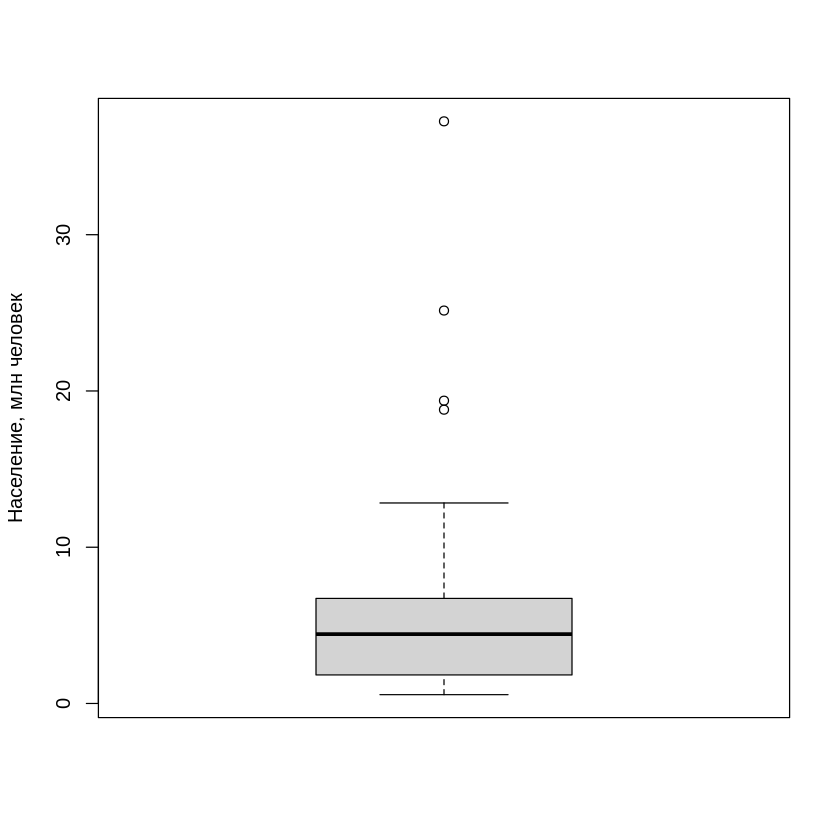

In [22]:
boxplot(state[["Population"]]/1000000, ylab="Население, млн человек")

Верх и низ коробки представляют собой соответственно 75-й и 25-й процентили.
Медиана показана в коробке горизонтальной линией. Пунктирные линии, называемые усами, выходят из верха и низа и говорят о размахе основной части данных. По умолчанию данная функция R
простирает усы к самой далекой точке вне коробки, за исключением того, что она
не выходит за пределы межквартильного размаха (МКР или IQR), умноженного
на 1,5 (в других программных системах могут использоваться иные правила). Все
данные за пределами усов отображаются как одиночные точки.

### Частотная таблица и гистограммы

Частотная таблица переменной делит диапазон переменной на равноотстоящие
сегменты и сообщает о том, сколько значений попадает в каждый сегмент.

In [23]:
breaks <- seq(from=min(state[["Population"]]),to=max(state[["Population"]]), length=11)
pop_freq <- cut(state[["Population"]], breaks=breaks, right=TRUE, include.lowest = TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

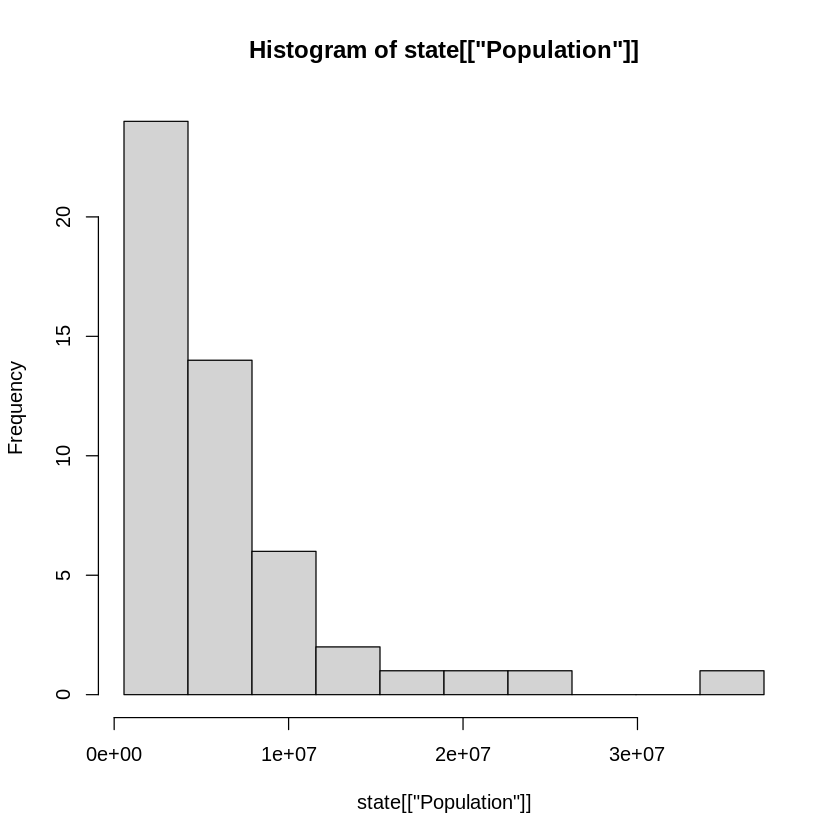

In [24]:
hist(state[["Population"]], breaks=breaks)